# EJERCICIOS

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer, roc_curve
from sklearn.svm import SVC 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score
from scipy.stats import reciprocal
from sklearn.pipeline import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns


## EJERCICIO 1

Vamos a trabajar con el siguiente conjunto de datos: https://www.datacamp.com/es/datalab/datasets/dataset-python-loans

| Variable      	| Explicación                                                                                                             |
|-------------------|-------------------------------------------------------------------------------------------------------------------------|
| credit_policy	    | 1 si el cliente cumple con los criterios de suscripción de crédito; 0 en caso contrario.                                |
| purpose	        | El propósito del préstamo.                                                                                              |
| int_rate	        | La tasa de interés del préstamo (a los prestatarios más riesgosos se les asignan tasas más altas).                      |
| installment	    | Las cuotas mensuales del prestamo                                                                                       |
| log_annual_inc    | El logaritmo natural del ingreso anual declarado por el prestatario.                                                    |
| dti	            | La relación deuda-ingreso del prestatario (monto de deuda dividido por ingresos anuales).                               |
| fico	            | El puntaje de crédito FICO del prestatario.                                                                             |
| days_with_cr_line	| El número de días que el prestatario ha tenido una línea de crédito.                                                    |
| revol_bal	        | El saldo rotativo del prestatario (monto no pagado al final del ciclo de facturación de la tarjeta).                    |
| revol_util        | La tasa de utilización de la línea de crédito del prestatario (monto de crédito utilizado respecto al total disponible).|
| inq_last_6mths	| El número de consultas de los acreedores al prestatario en los últimos 6 meses.                                         |
| delinq_2yrs	    | El número de veces que el prestatario ha estado más de 30 días en mora en un pago en los últimos 2 años.                |
| pub_rec	        | El número de registros públicos despectivos del prestatario.                                                            |
| not_fully_paid    | 1 si el préstamo se pagó totalmente; 0 en caso contrario.                                                        |

El csv lo tienes disponible en Moodle

Este conjunto de datos consta de más de 9500 préstamos con información sobre los datos del préstamo y si el préstamo fue pagado en su totalidad o no. Estos datos fueron extraídos de LendingClub.com
Crea un clasificador para predecir si un prestamo va a ser pagado o no.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [53]:
loan_data = pd.read_csv("loan_data.csv")

#### EXPLORAR LOS DATOS

Entre otras cosas: estadísticas, matriz de correlaciones y borrar columnas innecesarias.

In [54]:
loan_data.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [55]:
loan_data.describe()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [56]:
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [57]:
loan_data["purpose"].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [58]:
print(loan_data['not.fully.paid'].value_counts())

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64


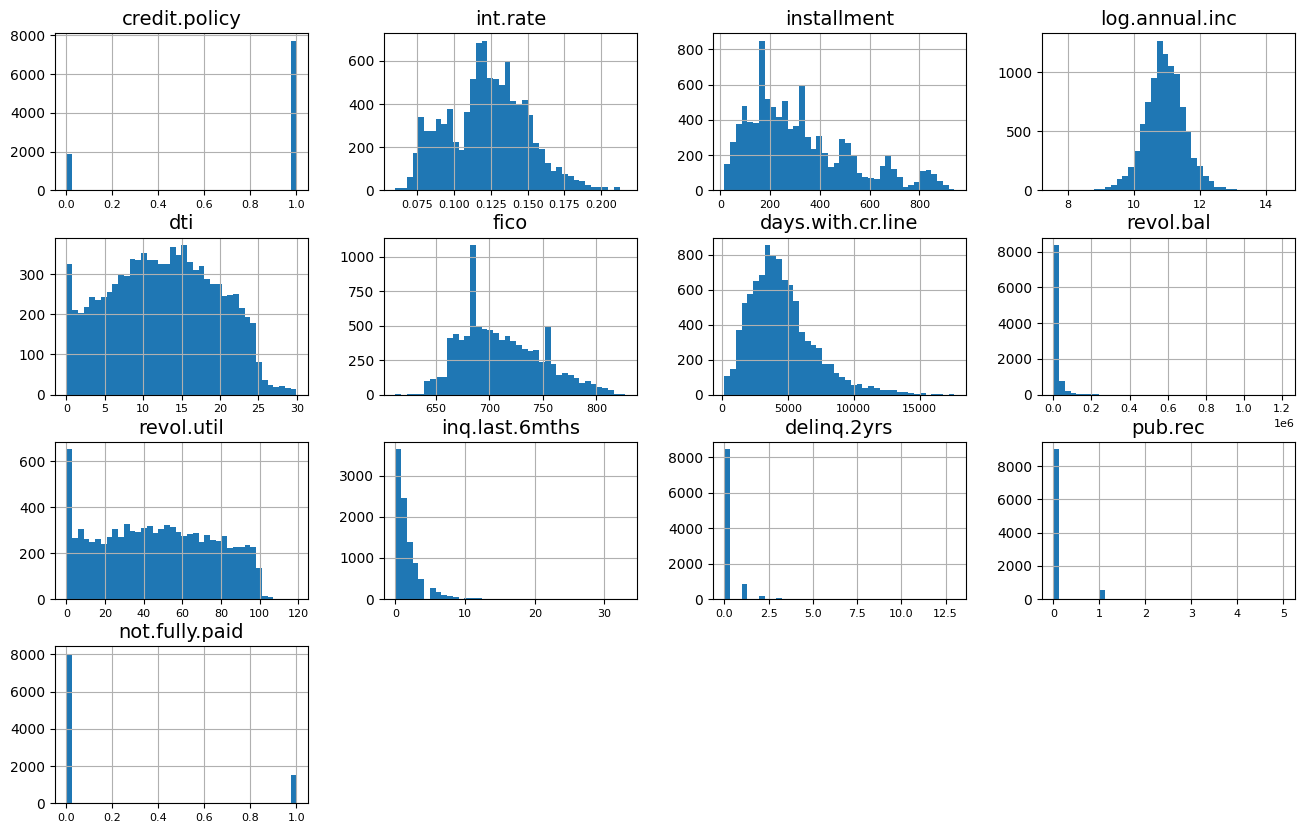

In [59]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=10)
loan_data.hist(bins=40, figsize=(16, 10))
plt.show()

In [60]:
matriz_correlacion = loan_data.corr(numeric_only=True)
matriz_correlacion.style.background_gradient()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


In [61]:
# Hay gráficos vacios y que me dan poca información, ya que me interesa not fully paid, voy a eliminar los que menos correlación tienen con esta columna
loan_data_min = loan_data.drop(columns=["installment","pub.rec","dti","delinq.2yrs","days.with.cr.line","log.annual.inc","revol.bal"])
loan_data_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   credit.policy   9578 non-null   int64  
 1   purpose         9578 non-null   object 
 2   int.rate        9578 non-null   float64
 3   fico            9578 non-null   int64  
 4   revol.util      9578 non-null   float64
 5   inq.last.6mths  9578 non-null   int64  
 6   not.fully.paid  9578 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 523.9+ KB


In [62]:
matriz_correlacion = loan_data_min.corr(numeric_only=True)
matriz_correlacion.style.background_gradient()

,credit.policy,int.rate,fico,revol.util,inq.last.6mths,not.fully.paid
credit.policy,1.000000,-0.294089,0.348319,-0.104095,-0.535511,-0.158119
int.rate,-0.294089,1.000000,-0.714821,0.464837,0.202780,0.159552
fico,0.348319,-0.714821,1.000000,-0.541289,-0.185293,-0.149666
revol.util,-0.104095,0.464837,-0.541289,1.000000,-0.013880,0.082088
inq.last.6mths,-0.535511,0.202780,-0.185293,-0.013880,1.000000,0.149452
not.fully.paid,-0.158119,0.159552,-0.149666,0.082088,0.149452,1.000000


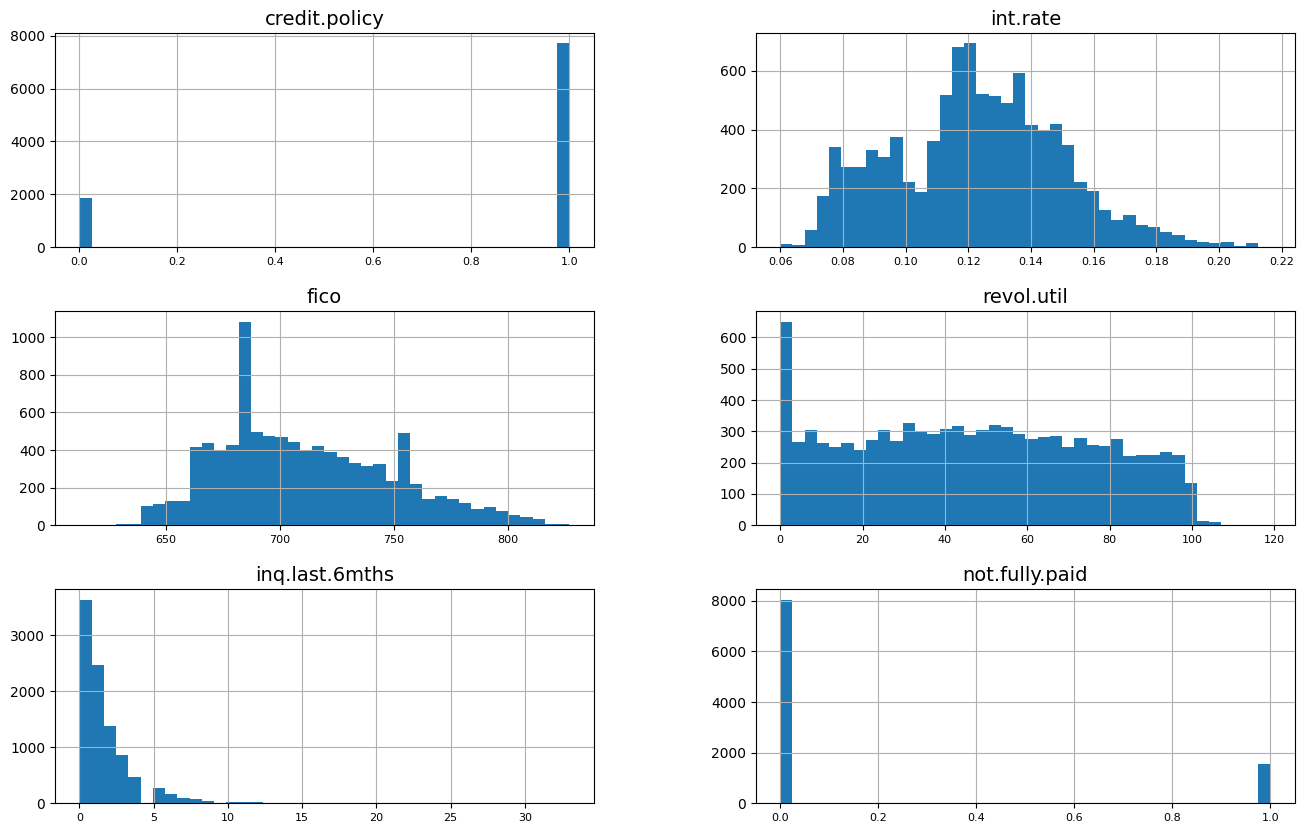

In [63]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=10)
loan_data_min.hist(bins=40, figsize=(16, 10))
plt.show()

#### DIVIDIR LOS DATOS

In [64]:
# VLa variable a por la que voy es not fully paid
X = loan_data_min.drop('not.fully.paid', axis=1)

y = loan_data_min['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (7662, 6)
Tamaño del conjunto de prueba: (1916, 6)


#### PREPARAR LOS DATOS

In [65]:
# Para las categoricas, ponemos most_frecuent y aplicamos one hot encoding

purpose_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    OneHotEncoder(sparse_output=False, handle_unknown='ignore')
)

# Para las numéricas, ponemos la media, y escalamos los datos
numericas_pipeline = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler() 
)

# Combinar las pipelines
pipeline_prestamos = ColumnTransformer(
    transformers=[
        ('Purpose', purpose_pipeline, ["purpose"]),  
        ('Numericas', numericas_pipeline, X.select_dtypes(include=[np.number]).columns.tolist()) # Para seleccionar las numericas
    ]
)

X_test_copy = X_test.copy()
df_test = pipeline_prestamos.fit_transform(X_test_copy)

column_names = pipeline_prestamos.get_feature_names_out()
df_test = pd.DataFrame(df_test, columns=column_names)

print(df_test.head())




   Purpose__purpose_all_other  Purpose__purpose_credit_card  \
0                         0.0                           0.0   
1                         0.0                           0.0   
2                         1.0                           0.0   
3                         0.0                           1.0   
4                         1.0                           0.0   

   Purpose__purpose_debt_consolidation  Purpose__purpose_educational  \
0                                  0.0                           0.0   
1                                  0.0                           1.0   
2                                  0.0                           0.0   
3                                  0.0                           0.0   
4                                  0.0                           0.0   

   Purpose__purpose_home_improvement  Purpose__purpose_major_purchase  \
0                                0.0                              0.0   
1                                0.0      

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos:
- Regresión logisitca
- SGDClassifier
- K vecinos mas cercanos
- Random Forest

 y evalua los resultados en el conjunto de entrenamiento con las siguientes métricas: exactitud, prescisión, sensibilidad, f1, curva de roc y área bajo la curva de roc

Evaluación de Regresión Logística
  - Exactitud: 0.84
  - Precisión: 0.42
  - Sensibilidad: 0.02
  - F1-Score: 0.04
  - Área bajo la curva ROC (AUC): 0.67
  - Curva de ROC


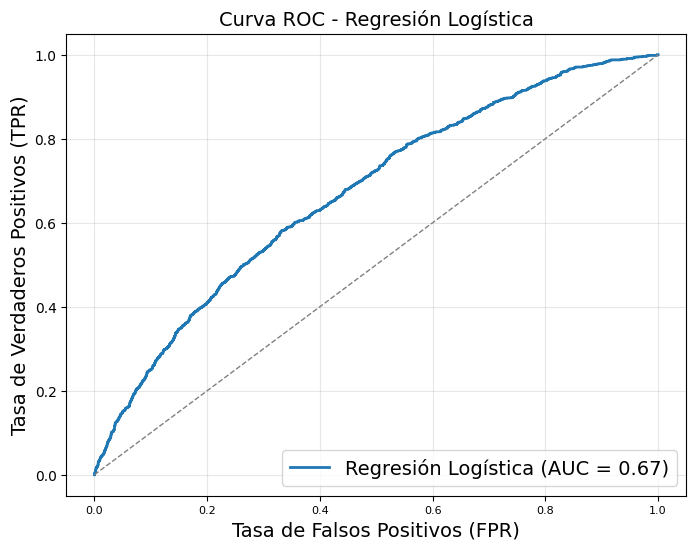

Evaluación de SGDClassifier
  - Exactitud: 0.84
  - Precisión: 0.33
  - Sensibilidad: 0.01
  - F1-Score: 0.02
  - Área bajo la curva ROC (AUC): 0.55
  - Curva de ROC


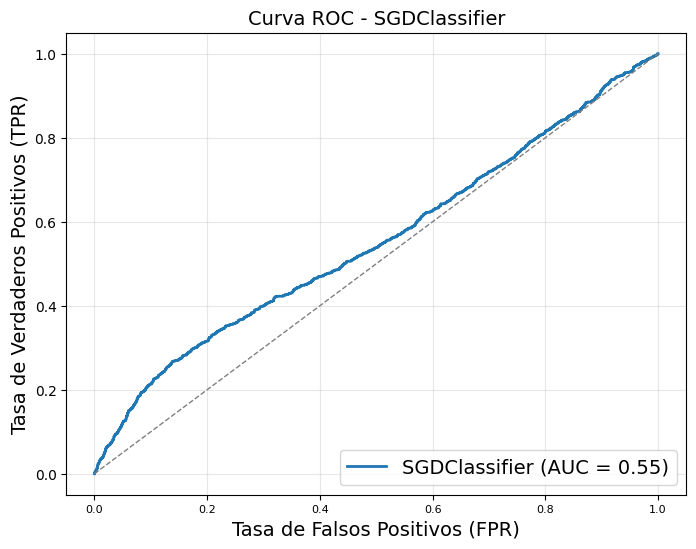

Evaluación de KNN
  - Exactitud: 0.82
  - Precisión: 0.26
  - Sensibilidad: 0.08
  - F1-Score: 0.12
  - Área bajo la curva ROC (AUC): 0.57
  - Curva de ROC


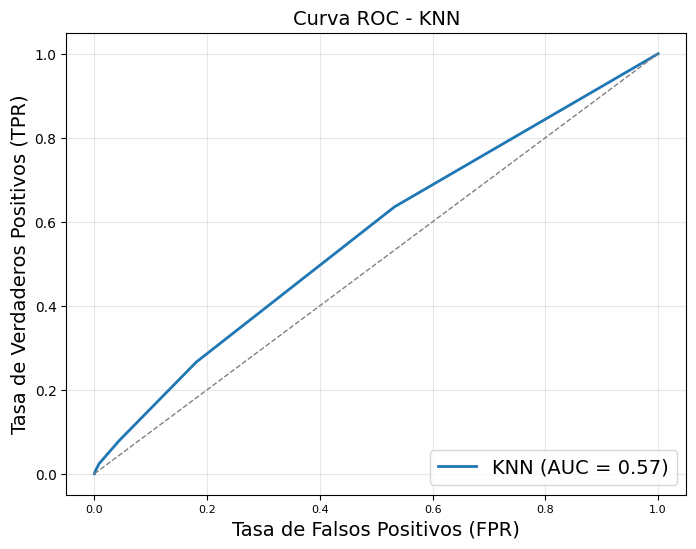

Evaluación de Random Forest
  - Exactitud: 0.82
  - Precisión: 0.26
  - Sensibilidad: 0.05
  - F1-Score: 0.09
  - Área bajo la curva ROC (AUC): 0.61
  - Curva de ROC


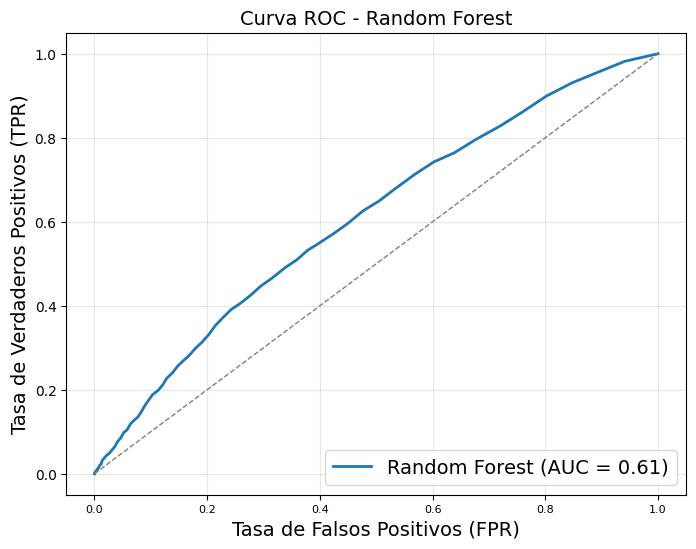

In [66]:

# Definir modelos a evaluar
modelos = {
    "Regresión Logística": LogisticRegression(random_state=42, max_iter=1000),
    "SGDClassifier": SGDClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Iterar sobre cada modelo
for nombre, modelo in modelos.items():
    print(f"Evaluación de {nombre}")
    
    # Crear pipeline
    pipeline = make_pipeline(pipeline_prestamos, modelo)
    
    # Validación cruzada: obtener predicciones
    y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=3)
    
    # Calcular métricas
    exactitud = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    sensibilidad = recall_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    
    # Imprimir resultados
    print(f"  - Exactitud: {exactitud:.2f}")
    print(f"  - Precisión: {precision:.2f}")
    print(f"  - Sensibilidad: {sensibilidad:.2f}")
    print(f"  - F1-Score: {f1:.2f}")
    
    # Evaluar probabilidades para curva ROC
    if hasattr(modelo, 'decision_function'):
        y_train_proba = cross_val_predict(pipeline, X_train, y_train, cv=3, method='decision_function')
    elif hasattr(modelo, 'predict_proba'):
        y_train_proba = cross_val_predict(pipeline, X_train, y_train, cv=3, method='predict_proba')[:, 1]
    else:
        print(f"{nombre} no soporta cálculo de probabilidades. Se omite la curva ROC.")
        print("")
        continue
    
    # Calcular curva ROC
    fpr, tpr, _ = roc_curve(y_train, y_train_proba)
    auc = roc_auc_score(y_train, y_train_proba)
    print(f"  - Área bajo la curva ROC (AUC): {auc:.2f}")
    print("  - Curva de ROC")
    # Graficar curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{nombre} (AUC = {auc:.2f})', lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)
    plt.title(f'Curva ROC - {nombre}')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

    


### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

In [67]:


# Espacio de hiperparámetros para RandomizedSearchCV
param_grid = {
    "logisticregression__C": [0.01, 0.1, 1, 10, 100],  # Regularización
    "logisticregression__penalty": ["l2", None],  # Penalty válido (None o l2)
    "logisticregression__solver": ["lbfgs", "saga"]  # Solvers compatibles
}

# Crear el pipeline con el modelo base (Regresión Logística en este caso)
pipeline = make_pipeline(pipeline_prestamos, LogisticRegression(random_state=42, max_iter=1000))

# Configuración de RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=10,  # Número de combinaciones aleatorias a probar
    scoring=make_scorer(f1_score),  # Optimizar F1-Score
    cv=3,  # Validación cruzada de 3 pliegues
    random_state=42,  # Reproducibilidad
    verbose=2,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ajustar la búsqueda en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Resultados de la búsqueda
print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor F1-Score en validación cruzada:", random_search.best_score_)

# Guardar el mejor modelo encontrado
mejor_modelo = random_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparámetros: {'logisticregression__solver': 'saga', 'logisticregression__penalty': 'l2', 'logisticregression__C': 100}
Mejor F1-Score en validación cruzada: 0.04008543764377912


#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el conjunto de pruebas con diferentes métricas

Evaluación en el conjunto de pruebas:
  - Exactitud: 0.84
  - Precisión: 0.44
  - Sensibilidad: 0.02
  - F1-Score: 0.04
  - Área bajo la curva ROC (AUC): 0.66


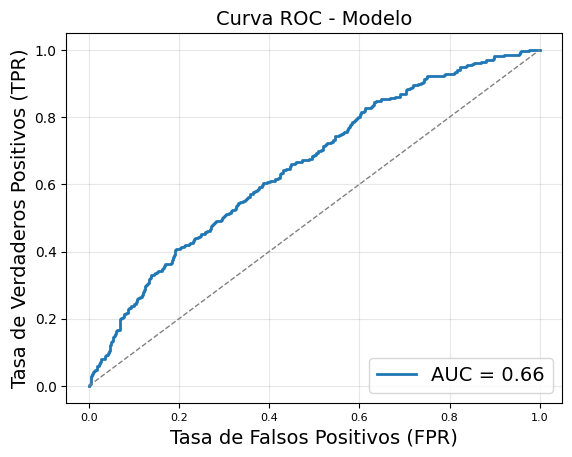

In [71]:
y_test_pred = mejor_modelo.predict(X_test)

# Calcular métricas
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Evaluación en el conjunto de pruebas:")
print(f"  - Exactitud: {test_accuracy:.2f}")
print(f"  - Precisión: {test_precision:.2f}")
print(f"  - Sensibilidad: {test_recall:.2f}")
print(f"  - F1-Score: {test_f1:.2f}")

# Evaluar el área bajo la curva ROC (AUC)
if hasattr(mejor_modelo.named_steps['logisticregression'], 'predict_proba'):
    y_test_proba = mejor_modelo.predict_proba(X_test)[:, 1]
    test_roc_auc = roc_auc_score(y_test, y_test_proba)
    print(f"  - Área bajo la curva ROC (AUC): {test_roc_auc:.2f}")
    
    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    
    # Hacer el gráfico
    plt.plot(fpr, tpr, label=f'AUC = {test_roc_auc:.2f}', lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)
    plt.title('Curva ROC - Modelo')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()
else:
    print("El modelo no soporta cálculo de probabilidades para la curva ROC.")



### PRESENTACIÓN DE LA SOLUCIÓN

Guarda mejor modelo (pipeline de preparación de los datos + modelo) y  haz un script de python que te pida los datos necesarios ('int_rate', 'installment', 'fico',  'revol_bal', 'revol_util', 'inq_last_6mths', 'pub_rec' y 'purpose') y prediga la solución.

In [72]:
joblib.dump(mejor_modelo, "./modelo.pkl")

['./modelo.pkl']

## EJERCICIO 2

Vamos a trabajar conun conjunto de datos digits.

Crea un clasificador que nos diga de que número se trata.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [69]:
# Cargar el conjunto de datos
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

#### EXPLORAR LOS DATOS

#### DIVIDIR LOS DATOS

#### PREPARAR LOS DATOS

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos, evalua los resultados en el conjunto de entrenamiento (exactitud) y calcula la matriz de confusión:
- Regresión logistica
- Maquinas de vectores de sorpote
- Random forest

### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

### PRESENTACIÓN DE LA SOLUCIÓN

Simplemente guarda el modelo

## EJERCICIO 3

Vamos a trabajar con un conjunto de datos donde cada instancia (en este caso, cada película) pueda tener múltiples etiquetas (géneros en este caso).

Tienes los datos en el fichero tmdb_5000_movies.csv

Crea un clasificador que te diga los generos que le corresponden a cada película.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [70]:
# Cargar los datos
data = pd.read_csv("Datos/tmdb_5000_movies.csv")

# Preprocesamiento de datos
# Transformar géneros en listas de palabras separadas
data["genres"] = data["genres"].apply(lambda x: [genre["name"] for genre in eval(x)])

# Dividir los datos en características (X) y etiquetas (y)
X = data["overview"]
y = data["genres"]

FileNotFoundError: [Errno 2] No such file or directory: 'Datos/tmdb_5000_movies.csv'

#### EXPLORAR LOS DATOS

#### DIVIDIR LOS DATOS

#### PREPARAR LOS DATOS

Tienes aquí las transformaciones que hay que hacer a los datos pero busca en internet que estamos haciendo exactamente y explicalo (igual hay que hacer algo con los datos que faltan)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

mlb = MultiLabelBinarizer()
y_train_transformed = mlb.fit_transform(y_train)


In [ ]:
y_test_transformed = mlb.transform(y_test)

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Crea un modelo Random Forest y evalúa el modelo en el conjunto de entrenamiento (accuracy), no hace falta usar validación cruzada.

#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el modelo en el conjuno de prueba y muestra las primeras 25 predicciones y sus correspondientes valores reales (con texto, para lo cual tendras que aplicar mlb.inverse_transform a las predicciones).

¿Qué puedes deducir del resultado?